In [19]:
import zipfile
with zipfile.ZipFile("./data.zip", 'r') as zip_ref:
    zip_ref.extractall("./data")

In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
print(check_output(["ls", "./data"]).decode("utf8"))
# Any results you write to the current directory are saved as output.

X.npy
Y.npy



In [21]:
X = np.load('./data/X.npy') # images
Y = np.load('./data/Y.npy') # labels associated to images (0 = no IDC, 1 = IDC)

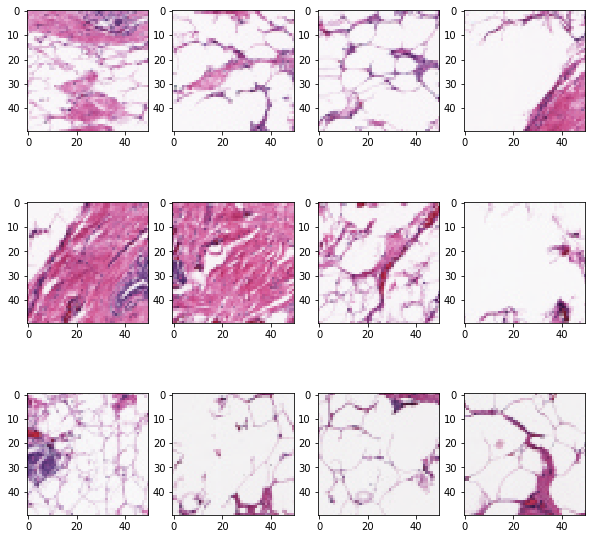

In [22]:
imgsize = 64
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

# # Display first 15 images of moles, and how they are classified
w=10
h=10
fig=plt.figure(figsize=(w, h))
columns = 4
rows = 3

for i in range(1,columns*rows+1):
    ax = fig.add_subplot(rows, columns, i)
    plt.imshow(X[i], interpolation='nearest')
plt.show()

In [23]:
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (5547, 50, 50, 3)
Y shape:  (5547,)


In [24]:

print(X[0][0][0])
# Normalization
X = X / 255.0
# print("X Shape:",X.shape)
print(X[0][0][0])




[226 164 206]
[0.88627451 0.64313725 0.80784314]


In [25]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.1, random_state=2)
numberoftrain = xtrain.shape[0]
numberoftest = xtest.shape[0]
xtrain.shape

(4992, 50, 50, 3)

In [26]:
#Reshape Xtrain & Xtest

xtrain = xtrain.reshape(numberoftrain,xtrain.shape[1]*xtrain.shape[2]*xtrain.shape[3])
xtest = xtest.reshape(numberoftest,xtest.shape[1]*xtest.shape[2]*xtest.shape[3])
print("X Train: ",xtrain.shape)
print("X Test: ",xtest.shape)

print(xtrain[0])


X Train:  (4992, 7500)
X Test:  (555, 7500)
[0.85098039 0.52156863 0.63137255 ... 0.50196078 0.41568627 0.56862745]


In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, value = 255.0):
    self.value = value
  def fit(self,X, y=None):
    return self # basically nothing to do here

  def transform(self, X, y=None):
    # doing transform operation on X attributes
    # by consider hyperparameter to control the flow of modifications
    # e.g. if some_hyperparameter do something else do something else
    # and finally return X
    return X/255.0

customTrans = CustomTransformer(value = 255.0)
transformed_dataset_df = customTrans.transform(xtrain)
print(transformed_dataset_df[0])

[0.00333718 0.00204537 0.00247597 ... 0.00196847 0.00163014 0.00222991]


In [28]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library

def create_model(optimizer='adam',
                 kernel_initializer='uniform'):
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = kernel_initializer, activation = 'relu', input_dim = xtrain.shape[1]))
    classifier.add(Dense(units = 8, kernel_initializer = kernel_initializer, activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = kernel_initializer, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score


kerasclassifier = KerasClassifier(build_fn = create_model, epochs = 100,verbose=2)
# accuracies = cross_val_score(estimator = kerasclassifier, X = xtrain, y = ytrain, cv = 3)


# pipeline_keras = Pipeline([('normalizer',customTrans),('keras', kerasclassifier)])

# pipeline_keras.fit(xtrain, ytrain)



In [30]:
accuracies = cross_val_score(kerasclassifier,xtrain,ytrain,cv=3)
mean = accuracies.mean()
variance = accuracies.std()
print("Keras Model Accuracy mean: "+ str(mean))
print("Keras Model Accuracy variance: "+ str(variance))

Epoch 1/100
104/104 - 0s - loss: 0.6916 - accuracy: 0.5066
Epoch 2/100
104/104 - 0s - loss: 0.6858 - accuracy: 0.5108
Epoch 3/100
104/104 - 0s - loss: 0.6591 - accuracy: 0.6139
Epoch 4/100
104/104 - 0s - loss: 0.6259 - accuracy: 0.6761
Epoch 5/100
104/104 - 0s - loss: 0.6083 - accuracy: 0.6962
Epoch 6/100
104/104 - 0s - loss: 0.5949 - accuracy: 0.7001
Epoch 7/100
104/104 - 0s - loss: 0.6047 - accuracy: 0.6830
Epoch 8/100
104/104 - 0s - loss: 0.5835 - accuracy: 0.7097
Epoch 9/100
104/104 - 0s - loss: 0.5613 - accuracy: 0.7302
Epoch 10/100
104/104 - 0s - loss: 0.5509 - accuracy: 0.7368
Epoch 11/100
104/104 - 0s - loss: 0.5406 - accuracy: 0.7422
Epoch 12/100
104/104 - 0s - loss: 0.5378 - accuracy: 0.7443
Epoch 13/100
104/104 - 0s - loss: 0.5245 - accuracy: 0.7554
Epoch 14/100
104/104 - 0s - loss: 0.5215 - accuracy: 0.7503
Epoch 15/100
104/104 - 0s - loss: 0.5335 - accuracy: 0.7407
Epoch 16/100
104/104 - 0s - loss: 0.5139 - accuracy: 0.7641
Epoch 17/100
104/104 - 0s - loss: 0.5035 - accura

104/104 - 0s - loss: 0.6931 - accuracy: 0.5057
Epoch 38/100
104/104 - 0s - loss: 0.6931 - accuracy: 0.5057
Epoch 39/100
104/104 - 0s - loss: 0.6931 - accuracy: 0.5057
Epoch 40/100
104/104 - 0s - loss: 0.6932 - accuracy: 0.5057
Epoch 41/100
104/104 - 0s - loss: 0.6931 - accuracy: 0.5057
Epoch 42/100
104/104 - 0s - loss: 0.6931 - accuracy: 0.5057
Epoch 43/100
104/104 - 0s - loss: 0.6931 - accuracy: 0.5057
Epoch 44/100
104/104 - 0s - loss: 0.6932 - accuracy: 0.5057
Epoch 45/100
104/104 - 0s - loss: 0.6931 - accuracy: 0.5057
Epoch 46/100
104/104 - 0s - loss: 0.6931 - accuracy: 0.5057
Epoch 47/100
104/104 - 0s - loss: 0.6931 - accuracy: 0.5057
Epoch 48/100
104/104 - 0s - loss: 0.6931 - accuracy: 0.5057
Epoch 49/100
104/104 - 0s - loss: 0.6931 - accuracy: 0.5057
Epoch 50/100
104/104 - 0s - loss: 0.6931 - accuracy: 0.5057
Epoch 51/100
104/104 - 0s - loss: 0.6931 - accuracy: 0.5057
Epoch 52/100
104/104 - 0s - loss: 0.6931 - accuracy: 0.5057
Epoch 53/100
104/104 - 0s - loss: 0.6931 - accuracy: 

104/104 - 0s - loss: 0.4586 - accuracy: 0.8056
Epoch 74/100
104/104 - 0s - loss: 0.4593 - accuracy: 0.8020
Epoch 75/100
104/104 - 0s - loss: 0.4632 - accuracy: 0.7966
Epoch 76/100
104/104 - 0s - loss: 0.5060 - accuracy: 0.7689
Epoch 77/100
104/104 - 0s - loss: 0.4577 - accuracy: 0.7987
Epoch 78/100
104/104 - 0s - loss: 0.4641 - accuracy: 0.7990
Epoch 79/100
104/104 - 0s - loss: 0.4716 - accuracy: 0.7915
Epoch 80/100
104/104 - 0s - loss: 0.4664 - accuracy: 0.7969
Epoch 81/100
104/104 - 0s - loss: 0.4559 - accuracy: 0.8071
Epoch 82/100
104/104 - 0s - loss: 0.4459 - accuracy: 0.8107
Epoch 83/100
104/104 - 0s - loss: 0.4661 - accuracy: 0.7954
Epoch 84/100
104/104 - 0s - loss: 0.4543 - accuracy: 0.8026
Epoch 85/100
104/104 - 0s - loss: 0.4619 - accuracy: 0.8026
Epoch 86/100
104/104 - 0s - loss: 0.4511 - accuracy: 0.8098
Epoch 87/100
104/104 - 0s - loss: 0.4502 - accuracy: 0.8068
Epoch 88/100
104/104 - 0s - loss: 0.4579 - accuracy: 0.7978
Epoch 89/100
104/104 - 0s - loss: 0.4577 - accuracy: 

In [31]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(xtrain,ytrain) #learning

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
#prediciton
print("Decision Tree Score: ",DTC.score(xtest,ytest))

Decision Tree Score:  0.6756756756756757


In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(n_estimators = 100, random_state=42) #n_estimator = DT
RFC.fit(xtrain,ytrain) # learning
print("Random Forest Score: ",RFC.score(xtest,ytest))


In [ ]:
#SVM with Sklearn

from sklearn.svm import SVC

SVM = SVC(random_state=42)
SVM.fit(xtrain,ytrain)  #learning 
#SVM Test 

print ("SVM Accuracy:", SVM.score(xtest,ytest))


In [ ]:
print(xtrain[0])
# pipeline_rfc = Pipeline([('normalizer',customTrans),('rfc', RFC)])
# pipeline_rfc.fit(xtrain, ytrain)


In [ ]:
# RFC is doing better among our models with the given data
# So let us save it to a file
from mlworkflows import util
util.serialize_to(SVM, "image_processing_model.sav")